# Pillow

## Basic

In [13]:
import os, sys
import numpy as np
from PIL import Image
from IPython.display import display
from matplotlib.pyplot import imshow

%matplotlib inline

In [14]:
im = Image.open("road.jpg")
print(im.format, im.size, im.mode)
im.save("road.png")

JPEG (1500, 1000) RGB


### Show

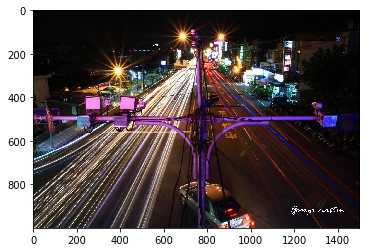

In [15]:
im = Image.open("road.png")

im.show()
# display(im)
imshow(np.asarray(im))

## Resize
#### Smaller image/ preserve the aspect of the image
resized_im = im.thumbnail(maxwidt, maxheight)
#### Or Resize image to exact specified size
resized_im = im.resize(width, height) 

In [16]:
size = (128, 128)
im.thumbnail(size)
print(im.format, im.size, im.mode)
im.save("road.thumbnail", "JPEG")

PNG (128, 85) RGB


In [17]:
print(im.format, "%dx%d" % im.size, im.mode)

PNG 128x85 RGB


## Cutting, pasting, and merging images

In [18]:
im = Image.open("road.jpg")
box = (100, 100, 400, 400)
region = im.crop(box)
# display(region)
region = region.transpose(Image.ROTATE_180)
# display(region)

im.paste(region, box)
# display(im)

crop with (left, upper, right, lower)

In [19]:
def roll(image, delta):
    """Roll an image sideways."""
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))

    return image

In [20]:
im = Image.open("road.jpg")
roll_img = roll(im, 500)
# display(roll_img)

In [21]:
im = Image.open("road.png")
xsize, ysize = im.size

mask_x = np.arange(0,xsize).astype('float') 
mask_x /= xsize/255
print(mask_x.shape)
mask = np.tile(mask_x, (ysize, 1))
print(mask.shape)
mask = np.uint8(mask)

background = Image.new("RGB", im.size, (0, 0, 0))
# display(background)
mask = Image.fromarray(mask)

# display(mask)
im.paste(background, (0,0,xsize, ysize), mask=mask)
# display(im)

(1500,)
(1000, 1500)


### Splitting and merging bands

In [22]:
im = Image.open("road.png")
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))
# display(im)

## Geometrical transforms

In [23]:
im = Image.open("road.png")
# display(im)
out = im.resize((128, 128))
print(out.size)
# display(out)
out = im.rotate(45) # degrees counter-clockwise
# display(out)

(128, 128)


In [24]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.rotate(270)
# display(out)
out = im.transpose(Image.ROTATE_270)
# display(out)

## Color transforms

In [25]:
im = Image.open("road.png")
im = im.convert("L")
# display(im)


## Image enhancement

### Filters

In [26]:
from PIL import ImageFilter

im = Image.open("road.png")
# display(im)
out = im.filter(ImageFilter.BLUR)
# display(out)

### Point Operations

In [27]:
# multiply each pixel by 1.2
out = im.point(lambda i: i * 1.8)
# display(out)

In [28]:
im = Image.open("road.png")
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 1.8)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)
# display(im)

## Enhancement

In [29]:
from PIL import ImageEnhance


im = Image.open("road.png")
enh = ImageEnhance.Contrast(im)
enh = enh.enhance(1.3)
# display(enh)